In [21]:
%reset
print('Variables reset')

Variables reset


In [75]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(f"Finished imports at {current_time}")

Finished imports at 11:04:24


In [76]:
# ODE to be solved
# du/dt = -3t^2(u-2)
def ode(u, t):
    return -4.0 * t ** 2.0 * (u - 2.0)

# Analytic solution
def analytic(t, s):
    return s * math.exp(-t ** 3.0) + 2.0

# Storage arrays
times = np.array([])
us = np.array([])

# Constants
t0 = 0.0
tn = 1.5
n = 1500
s = 0.170320179

# Initial conditions
u0 = 2 + s
u = u0
t = t0

# Calculate step size
h = (tn - t0)/n

# Counter for displaying at correct times
counter = 1
# Number of steps between each output for time intervals of 0.1
factor = n/tn * 0.1
print(f"Steps between outputs: {factor}")

# Always output initial values at t = 0
print(f"{t} {u}")

# First step - Euler's method
fnew = ode(u, t)    # Calculate new function value
u = u0 + h * fnew   # Calculate next value for u
fold = fnew         # Store f
t = t + h           # Update t

# Store output
us = np.append(us, u)
times = np.append(times, t)

# Output if time is multiple of 0.1
if(counter % factor == 0):
    print(f"{t} {u}")
counter += 1

# Adams-Bashforth 2nd order method
for i in range(n - 1):
    fnew = ode(u, t)                    # Calculate new f
    u = u + h/2.0 * (3 * fnew - fold)   # Calculate next u
    fold = fnew                         # Store f
    t = t + h                           # Update t


    # Store output
    us = np.append(us, u)
    times = np.append(times, t)
    
    # Output if time is multiple of 0.1
    if(counter % factor == 0):
        print(f"{t} {u}")
    counter += 1

# Set numeric output 
u_numeric = u

# Calculate analytic output result and error
u_analytic = analytic(tn, s)
abs_err = abs(u_analytic - u_numeric)

# print(f"h^2: {h**2}")
# print(f"u_analytic: {u_analytic}")
# print(f"u_numeric: {u_numeric}")
# print(f"abs_err: {abs_err}")

Steps between outputs: 100.0
0.0 2.170320179
0.10000000000000007 2.170093292948492
0.20000000000000015 2.1685131947430443
0.3000000000000002 2.1642978583688484
0.4000000000000003 2.1563892077170883
0.5000000000000003 2.144173073496202
0.6000000000000004 2.127699632414051
0.7000000000000005 2.1078074739754284
0.8000000000000006 2.0860572505358137
0.9000000000000007 2.0644363771246237
1.0000000000000007 2.0448957834644688
1.0999999999999897 2.028875972497283
1.1999999999999786 2.0170078834859075
1.2999999999999676 2.0091006550305917
1.3999999999999566 2.0043886417818886
1.4999999999999456 2.001892123100468


<function matplotlib.pyplot.show(close=None, block=None)>

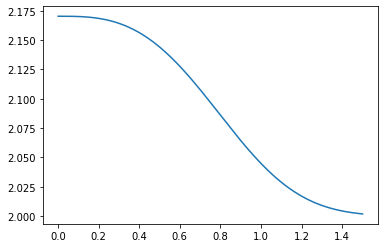

In [77]:
plt.plot(times, us)
plt.show